In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('F:/project_1_Netflix_AJ/netflix_titles.csv')

In [3]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(8807, 12)

In [10]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<Axes: xlabel='type'>

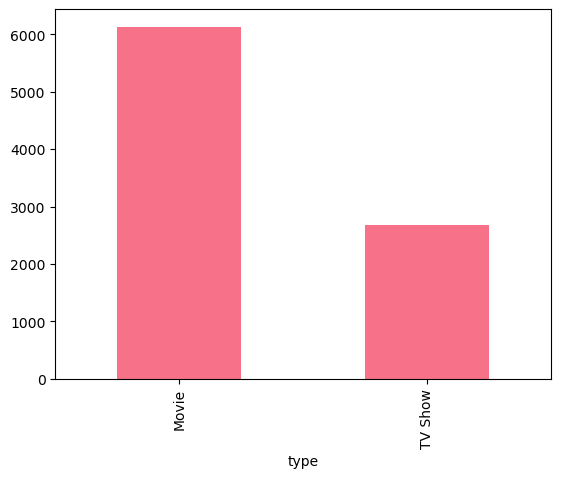

In [11]:
sns.set_palette("husl")
group_types = df.groupby(["type"]).count()["show_id"]
group_types.plot(kind="bar")

<Axes: ylabel='show_id'>

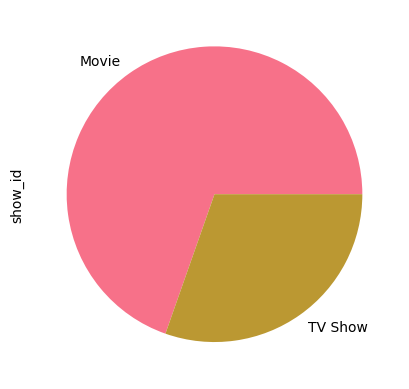

In [12]:
group_types.plot(kind = "pie")

In [13]:
group_types

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

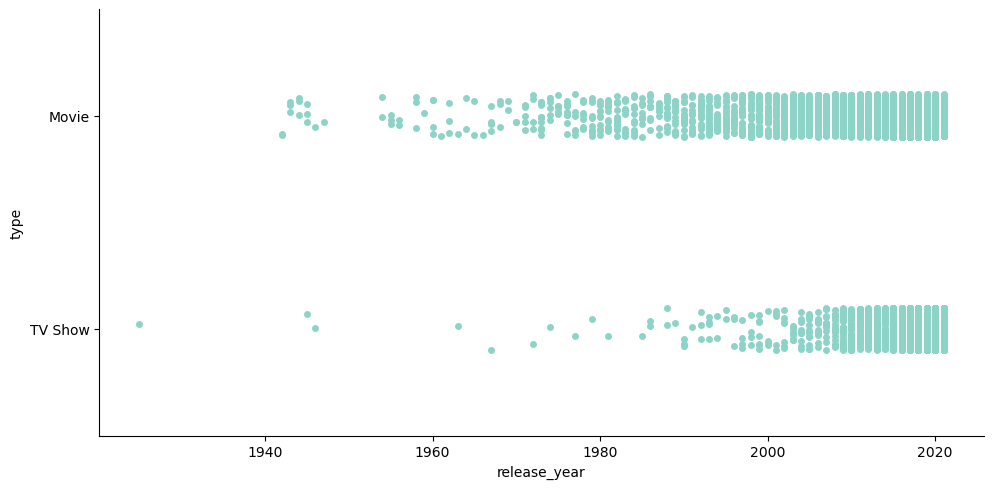

In [14]:
sns.set_palette("Set3")
sns.catplot(x ="release_year", y = "type", data=df, aspect=2)

### 3. Show the relationship between the country and the rating of the movies based on the type

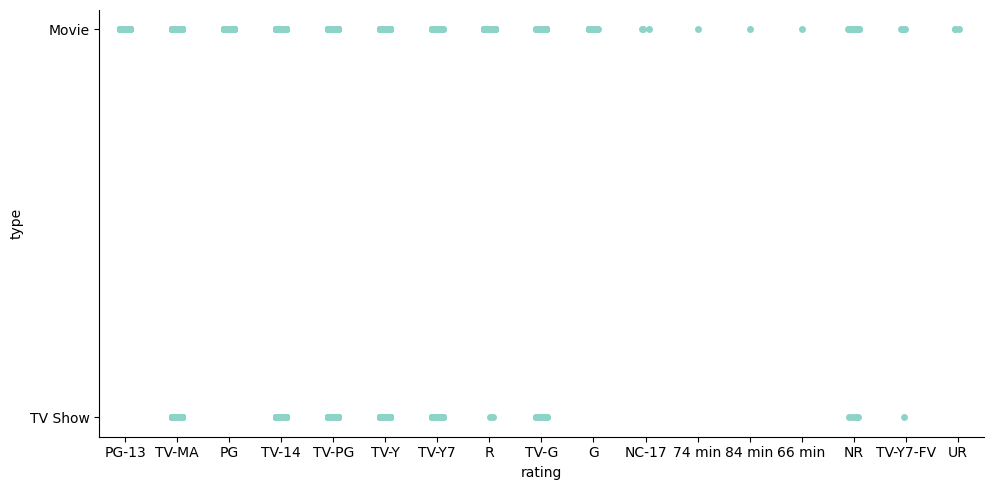

In [16]:
sns.catplot(x="rating", y ="type", data =df, aspect =2)

### Time Series Analysis

In [18]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', dayfirst=False, errors='coerce')

In [19]:
df_time = df.groupby(df["date_added"]).count()["show_id"]
df_time =pd.DataFrame(df_time)
df_time

,show_id
date_added,
2008-01-01,1
2008-02-04,1
2009-05-05,1
2009-11-18,1
2010-11-01,1
...,...
2021-09-21,5
2021-09-22,9
2021-09-23,2


In [20]:
df_time.rename({"show_id": "count_shows"}, axis = 1, inplace= True)

In [21]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1714 entries, 2008-01-01 to 2021-09-25
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   count_shows  1714 non-null   int64
dtypes: int64(1)
memory usage: 26.8 KB


<Axes: xlabel='date_added'>

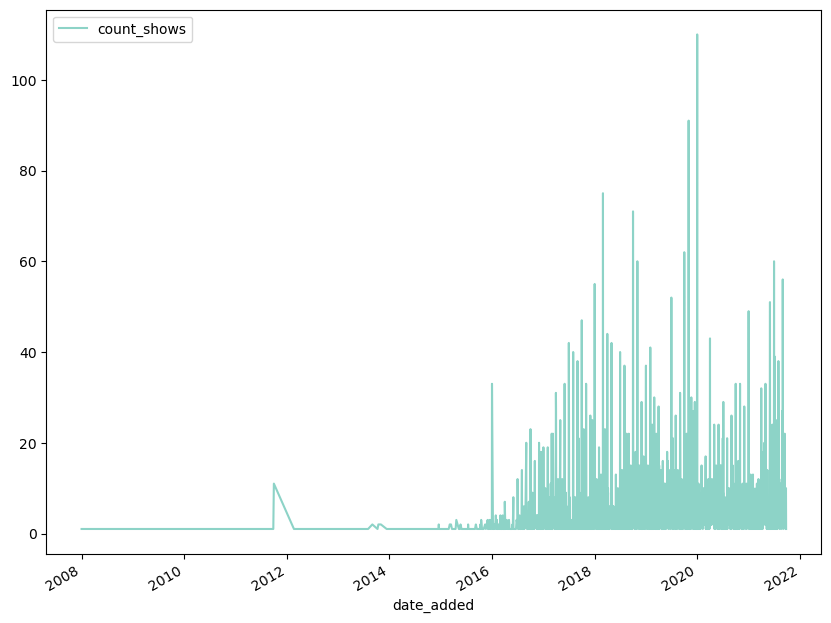

In [22]:
df_time.plot(kind ="line", figsize = (10,8))

<Axes: ylabel='count_shows'>

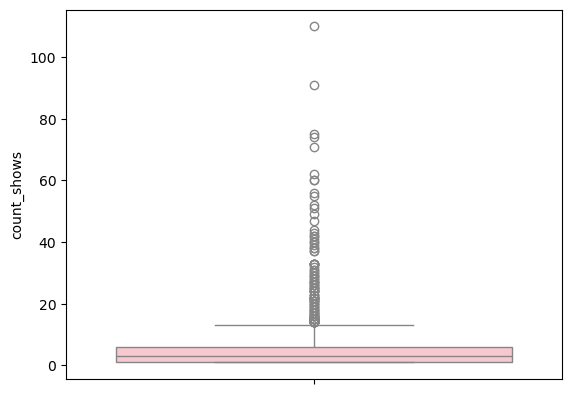

In [23]:
sns.boxplot(df_time["count_shows"], color = "pink")

<Axes: xlabel='count_shows', ylabel='Density'>

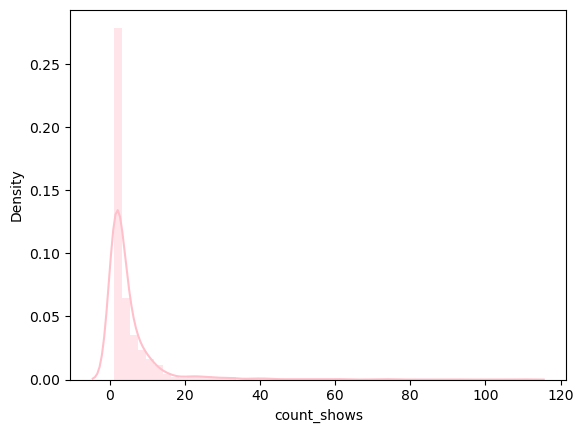

In [24]:
sns.distplot(df_time["count_shows"], color ="pink")

In [25]:
def ACF_and_PACF(data):
    fig = plt.figure(figsize=(17,10))
    ax1=fig.add_subplot(211)
    fig = plot_acf(data , lags = 30 , ax = ax1)
    ax2 = fig.add_subplot(212)
    fig = plot_pacf(data , lags = 30 , ax = ax2)

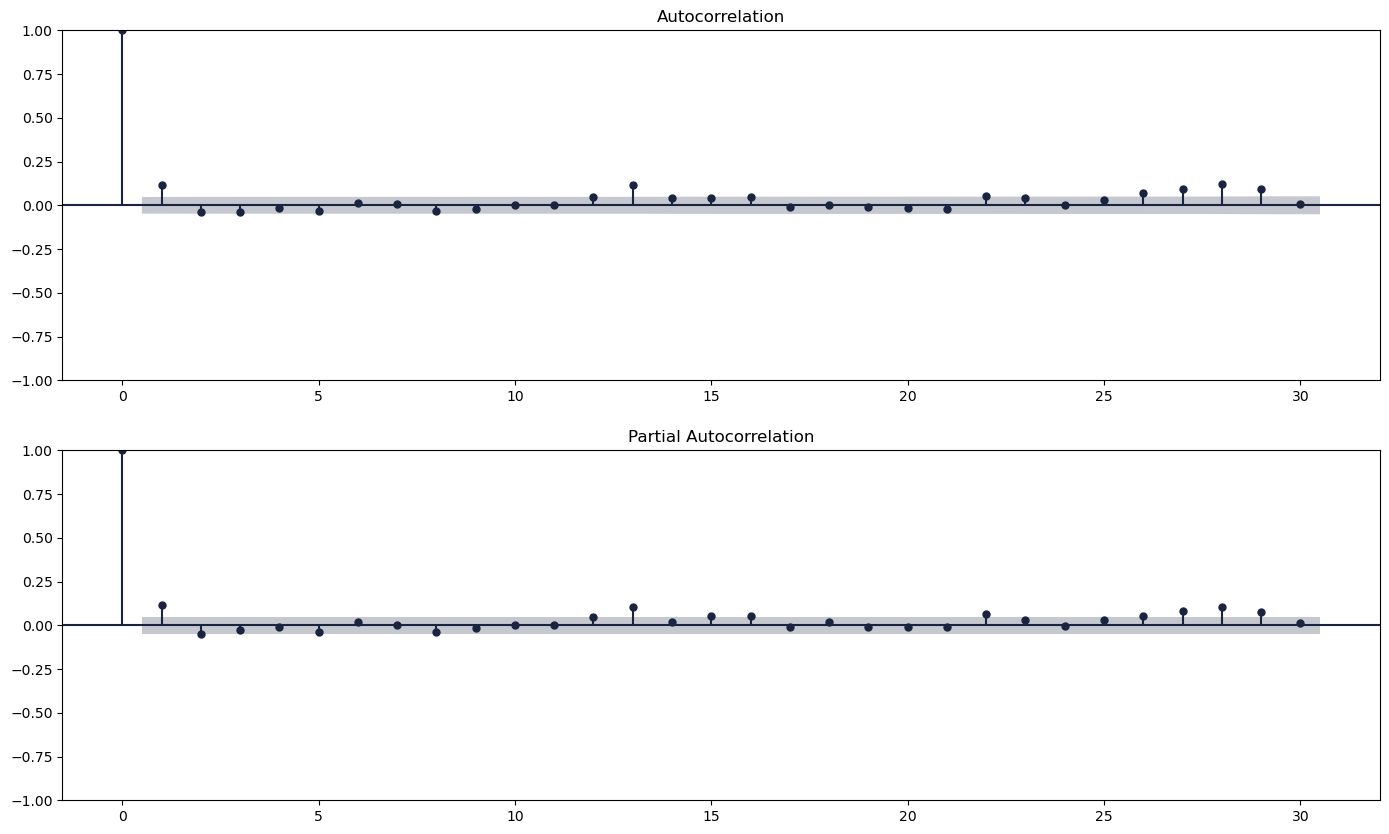

In [26]:
sns.set_palette("cubehelix")
ACF_and_PACF(df_time['count_shows'])

In [27]:
# determine rolling mean and deviation

rolmean = df_time.rolling(window =12).mean()
rolstd = df_time.rolling(window =12).std()

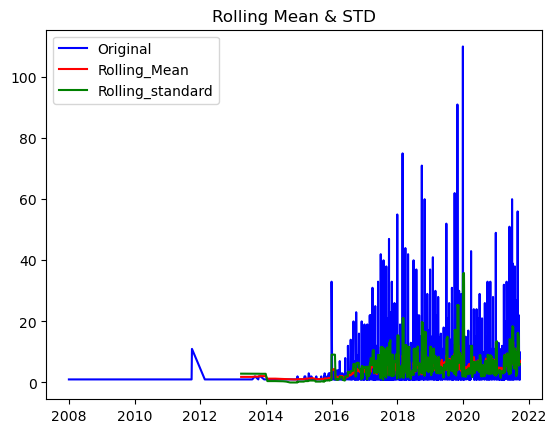

In [28]:
original = plt.plot(df_time, color = "blue", label = "Original")
mean = plt.plot(rolmean, color ="red", label = "Rolling_Mean")
std = plt.plot(rolstd, color = "green", label = "Rolling_standard")
plt.legend(loc = "best")
plt.title ("Rolling Mean & STD")
plt.show()

In [29]:
print("Results of dickey fuller Test")
dftest = adfuller(df_time['count_shows'], autolag = "AIC")

dfoutput = pd.Series(dftest[0:4], index =['testStatistics', 'p-value', '#lags used', 'Number of observation used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of dickey fuller Test
testStatistics               -8.405141e+00
p-value                       2.177844e-13
#lags used                    1.500000e+01
Number of observation used    1.698000e+03
Critical Value (1%)          -3.434207e+00
Critical Value (5%)          -2.863244e+00
Critical Value (10%)         -2.567677e+00
dtype: float64


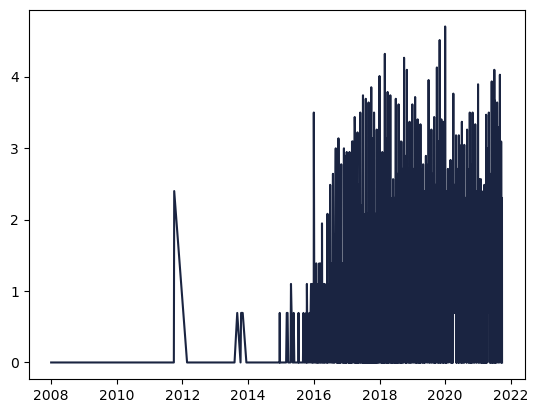

In [50]:
df_time_logScale = np.log(df_time)
plt.plot(df_time_logScale)

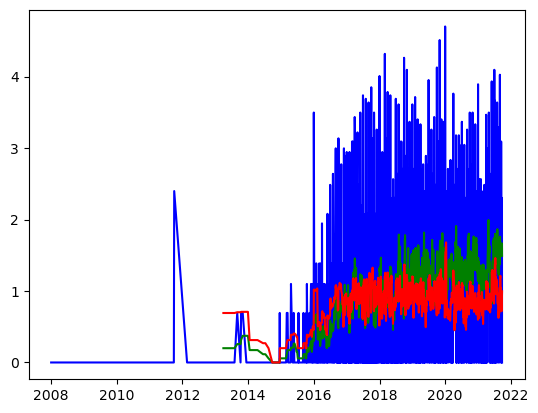

In [58]:
#The below transformation is required to make series stationary
movingAverage = df_time_logScale.rolling(window=12).mean()
movingSTD = df_time_logScale.rolling(window=12).std()
plt.plot(df_time_logScale, color = 'blue')
plt.plot(movingAverage, color='green')
plt.plot(movingSTD, color='red')

In [60]:
new_data = df_time_logScale -movingAverage
new_data= new_data.dropna()
new_data.head()

,count_shows
date_added,
2013-03-31,-0.199825
2013-08-02,-0.199825
2013-09-01,0.435560
2013-10-08,-0.257587
2013-10-14,0.377798


In [64]:
print("Results of dickey fuller Test")
dftest = adfuller(new_data['count_shows'], autolag = "AIC")

dfoutput = pd.Series(dftest[0:4], index =['testStatistics', 'p-value', '#lags used', 'Number of observation used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of dickey fuller Test
testStatistics               -1.379126e+01
p-value                       8.917222e-26
#lags used                    2.500000e+01
Number of observation used    1.677000e+03
Critical Value (1%)          -3.434255e+00
Critical Value (5%)          -2.863265e+00
Critical Value (10%)         -2.567688e+00
dtype: float64


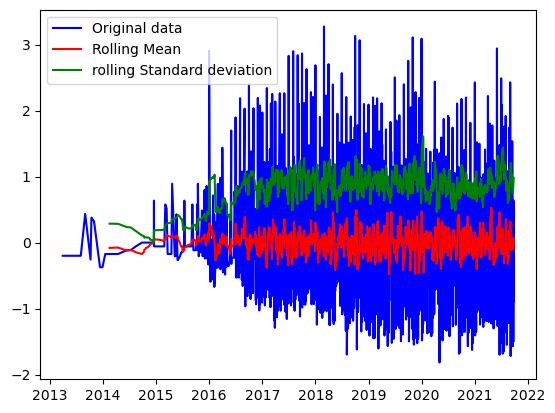

In [66]:
# rolling mean and standard deviation
mean_log = new_data.rolling(window =12).mean()
std_log = new_data.rolling(window = 12).std()

plt.plot(new_data, color ='blue', label='Original data')
plt.plot(mean_log, color ='red', label ='Rolling Mean')
plt.plot(std_log, color ='green', label ='rolling Standard deviation')
plt.legend(loc='best')